# Calculating Dissimilarity Indices

In this tutorial, we will learn how to calculate dissimilarity indices between different racial groups in a dataset of districts using Python. The dataset consists of the number of individuals in each racial group for each district.

In [ ]:
%pip install nycschools
import pandas as pd

In [2]:
from nycschools import schools

In [3]:
district_data = pd.read_csv('/Users/rwilcox/GitHub/newprojectnotebook/district_data.csv')


## Outline

1. Introduction to the Dissimilarity Index
2. Defining the Dissimilarity Index function
3. Generating race pairs
4. Calculating dissimilarity indices for each pair
5. Displaying the results
6. Analyzing the results

### 1. Introduction to the Dissimilarity Index

The dissimilarity index is a measure of segregation between two groups in a population. It ranges from 0 (complete integration) to 1 (complete segregation). It is calculated by taking the sum of the absolute differences between the proportions of each group in each district and then dividing by 2.

### 2. Defining the Dissimilarity Index function

First, we define a function called dissimilarity_index that calculates the dissimilarity index between two groups. The function takes three arguments:

- district_data: A DataFrame containing the data for each district
- group_a: A string representing the column name for the first group
- group_b: A string representing the column name for the second group

The function calculates the proportions of each group in each district, the absolute difference between those proportions, and then returns the sum of those differences divided by 2.

In [4]:
def dissimilarity_index(district_data, group_a, group_b):
    total_group_a = district_data[group_a].sum()
    total_group_b = district_data[group_b].sum()
    district_data['group_a_prop'] = district_data[group_a] / total_group_a
    district_data['group_b_prop'] = district_data[group_b] / total_group_b
    district_data['abs_diff'] = abs(district_data['group_a_prop'] - district_data['group_b_prop'])
    return 0.5 * district_data['abs_diff'].sum()


### 3. Generating race pairs

Next, we define a list of column names representing different racial groups in our dataset. Then, we use the itertools.combinations function to generate a list of unique pairs of racial groups.

In [5]:
import itertools

race_columns = ['white_n', 'black_n', 'asian_n', 'hispanic_n', 'multi_racial_n', 'native_american_n']
race_pairs = list(itertools.combinations(race_columns, 2))


### 4. Calculating dissimilarity indices for each pair

We create an empty dictionary called dissimilarity_indices to store the calculated dissimilarity indices for each pair of racial groups. Then, we iterate through the race pairs and call the dissimilarity_index function to calculate the dissimilarity index for each pair. We store the result in the dissimilarity_indices dictionary.

In [6]:
dissimilarity_indices = {}

for pair in race_pairs:
    group_a, group_b = pair
    index = dissimilarity_index(district_data, group_a, group_b)
    dissimilarity_indices[f"{group_a}-{group_b}"] = index


### 5. Displaying the results

Finally, we print the calculated dissimilarity indices for each pair of racial groups.

In [7]:
print("Dissimilarity Indices:")
for pair, index in dissimilarity_indices.items():
    print(f"{pair}: {index:.3f}")
    

Dissimilarity Indices:
white_n-black_n: 0.567
white_n-asian_n: 0.322
white_n-hispanic_n: 0.449
white_n-multi_racial_n: 0.278
white_n-native_american_n: 0.546
black_n-asian_n: 0.572
black_n-hispanic_n: 0.383
black_n-multi_racial_n: 0.467
black_n-native_american_n: 0.323
asian_n-hispanic_n: 0.447
asian_n-multi_racial_n: 0.414
asian_n-native_american_n: 0.483
hispanic_n-multi_racial_n: 0.402
hispanic_n-native_american_n: 0.357
multi_racial_n-native_american_n: 0.442


This will output the dissimilarity index for each pair of racial groups in the dataset, giving us a measure of segregation between those groups in the districts.

### 6. Analyzing the Results

In this section, we will discuss how to analyze the dissimilarity indices calculated in the previous section to better understand the segregation patterns between different racial groups in the dataset.

#### Interpretation of the Dissimilarity Index

The dissimilarity index ranges from 0 to 1, where:

- 0 indicates complete integration (no segregation) between the two groups.
- 1 indicates complete segregation, meaning that the two groups are entirely separated from each other.

Generally, the higher the index, the higher the level of segregation between the two groups. However, it is important to note that the dissimilarity index is sensitive to the overall distribution of the groups in the dataset, so it's essential to consider the context of the data when interpreting the results.

#### Comparing Dissimilarity Indices

When comparing dissimilarity indices, it is important to consider:

1. <b>Relative values</b>: Comparing the indices between different pairs of racial groups can help identify which pairs have higher segregation levels.

In [8]:
max_pair = max(dissimilarity_indices, key=dissimilarity_indices.get)
min_pair = min(dissimilarity_indices, key=dissimilarity_indices.get)

print(f"Highest dissimilarity index: {max_pair} ({dissimilarity_indices[max_pair]:.3f})")
print(f"Lowest dissimilarity index: {min_pair} ({dissimilarity_indices[min_pair]:.3f})")


Highest dissimilarity index: black_n-asian_n (0.572)
Lowest dissimilarity index: white_n-multi_racial_n (0.278)


2. <b>Thresholds</b>: It may be useful to define thresholds for interpretation. For example, one might consider indices below 0.3 as low segregation, between 0.3 and 0.6 as moderate segregation, and above 0.6 as high segregation. Keep in mind that these thresholds are arbitrary and depend on the context of your analysis.

In [9]:
low_segregation = {k: v for k, v in dissimilarity_indices.items() if v < 0.3}
moderate_segregation = {k: v for k, v in dissimilarity_indices.items() if 0.3 <= v <= 0.6}
high_segregation = {k: v for k, v in dissimilarity_indices.items() if v > 0.6}

print(f"Low segregation pairs: {low_segregation}")
print(f"Moderate segregation pairs: {moderate_segregation}")
print(f"High segregation pairs: {high_segregation}")


Low segregation pairs: {'white_n-multi_racial_n': 0.2777525043608225}
Moderate segregation pairs: {'white_n-black_n': 0.5674860311495079, 'white_n-asian_n': 0.3223899853124502, 'white_n-hispanic_n': 0.44897005945541085, 'white_n-native_american_n': 0.5459593013589181, 'black_n-asian_n': 0.5719188128633518, 'black_n-hispanic_n': 0.38260825508571494, 'black_n-multi_racial_n': 0.4673445701447822, 'black_n-native_american_n': 0.32271901992001095, 'asian_n-hispanic_n': 0.4469373515995837, 'asian_n-multi_racial_n': 0.41448748955858605, 'asian_n-native_american_n': 0.48298668848295045, 'hispanic_n-multi_racial_n': 0.401859223083039, 'hispanic_n-native_american_n': 0.3568756315945791, 'multi_racial_n-native_american_n': 0.4424473815392592}
High segregation pairs: {}


### Visualizing the Results

Visualizing the dissimilarity indices can help provide a better understanding of the segregation patterns. For example, you can create a bar chart to display the dissimilarity indices for each pair of racial groups:

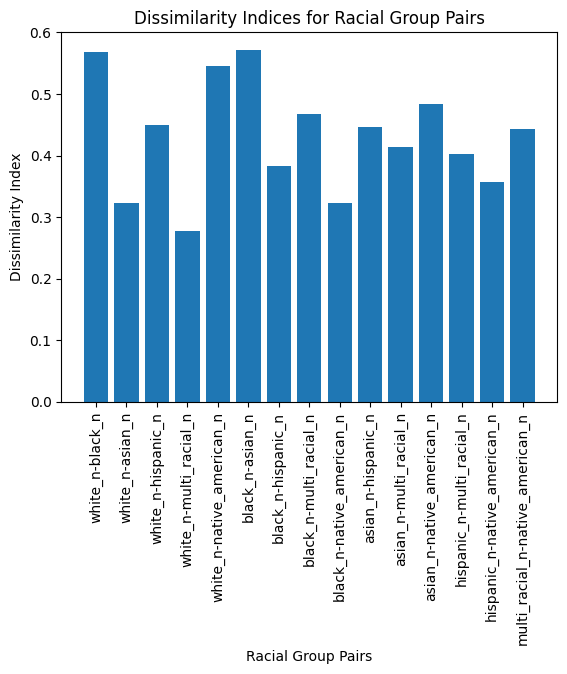

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pairs = list(dissimilarity_indices.keys())
indices = list(dissimilarity_indices.values())

ax.bar(pairs, indices)
ax.set_xlabel('Racial Group Pairs')
ax.set_ylabel('Dissimilarity Index')
ax.set_title('Dissimilarity Indices for Racial Group Pairs')

plt.xticks(rotation=90)
plt.show()


This visualization can help identify the pairs with the highest and lowest levels of segregation and make it easier to compare the dissimilarity indices between different racial groups.